<a href="https://colab.research.google.com/github/mukul-mschauhan/Data-Science-Projects/blob/master/Chi_Square_Tests_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About Chi Square Tests

1. A Chi Square test is a test of hypothesis where two samples are tested for Independence.

2. It means whether the samples are independent of each other or not.

3. Here we dont compare means or variance. Here, we have Categorical variables on which we test the hypothesis of Independence.

4. Here, we check whether the variables are independent of each other or there is a pattern of dependence between them.

5. If there is a Dependence, researcher claims that two variables have statistical relationship.

6. Since, it is a test on categories, hence the test is highly dependent on Frequencies. The Sample Of Data received is called "Observed Frequencies" and we find out the expected frequencies basis the data received.

7. The Chi Square Test is based on the difference between the Observed and the Expected Values. sum[(Obs - Exp)**2/Exp]

Q. A University conducted a survey of its recent graduates to collect demographic and health information for future planning purposes as well as to assess students' satisfaction with their undergraduate experiences. The survey revealed that a substantial proportion of students were not engaging in regular exercise, many felt their nutrition was poor and a substantial number were smoking. In response to a question on regular exercise, 60% of all graduates reported getting no regular exercise, 25% reported exercising sporadically and 15% reported exercising regularly as undergraduates. 

The next year the University launched a health promotion campaign on campus in an attempt to increase health behaviors among undergraduates. The program included modules on exercise, nutrition and smoking cessation. To evaluate the impact of the program, the University again surveyed graduates and asked the same questions. The survey was completed by 470 graduates and the following data were collected on the exercise question:

The Distribution of the responses for the last year have been (60%, 25%, 15%).

Based on the data, is there evidence of a shift in the distribution of responses to the exercise question following the implementation of the health promotion campaign on campus? Run the test at a 5% level of significance.

### Null Hypothesis:

The Responses are 60%, 25% and 15%

### Alternate Hypothesis:

Responses have changed meaning H0 is False.


In [0]:
import numpy as np
import pandas as pd
from scipy import stats

In [0]:
dict_ex = {"No Regular Exercise": [255], "Irregular": [125], "Regular": [90]}

In [22]:
dict_ex

{'Irregular': [125], 'No Regular Exercise': [255], 'Regular': [90]}

In [0]:
df = pd.DataFrame({"Observed": [255, 125, 90]})
total = df.Observed.sum()

In [0]:
# proportion = [i for i in df["Observed"]/total]
proportion = [0.60, 0.25, 0.15]

expected =[]
for i in proportion:
  expected.append(total * i)

In [0]:
df["Expected"] = expected

In [101]:
stats.chisquare([255, 125, 90], [282, 117.5, 70.5])

Power_divergenceResult(statistic=8.457446808510639, pvalue=0.014570979931304122)

In [0]:
df["Obs-Exp**2"] = (df.Observed - df.Expected)**2/df.Expected

In [50]:
df["Obs-Exp**2"].sum()

8.457446808510639

In [105]:
# Chi square Critical Value - Needs LOS and DF
stats.chi2.ppf(0.95, 2)

5.991464547107979

### Conclusion

Since the Test Statistic 8.45 is greater than Chi Square Critical Value 5.99 and hence we  reject the Ho meaning that the responses towards exercise has changed.


The National Center for Health Statistics (NCHS) provided data on the distribution of weight (in categories) among Americans in 2002. The distribution was based on specific values of body mass index (BMI) computed as weight in kilograms over height in meters squared.

Underweight was defined as BMI< 18.5, Normal weight as BMI between 18.5 and 24.9, overweight as BMI between 25 and 29.9 and obese as BMI of 30 or greater.

Americans in 2002 were distributed as follows: 2% Underweight, 39% Normal Weight, 36% Overweight, and 23% Obese.

Suppose we want to assess whether the distribution of BMI is different in the Framingham Offspring sample. Using data from the n=3,326 participants who attended the seventh examination of the Offspring in the Framingham Heart Study we created the BMI categories as defined and observed the following:


In [0]:
weights = {"Underweight":20, "Normal": 932, "Overweight": 1374,
           "Obese": 1000}

In [0]:
df = pd.DataFrame({"Observed": [20, 932, 1374, 1000]})

In [0]:
# Find the Expected - 2, 39, 36, 23
prop = [0.02, 0.39, 0.36, 0.23]
exp = []
for i in prop:
  exp.append(i*df.Observed.sum())

In [0]:
df["Expected"] = exp

In [0]:
df["Obs-Exp**2"] = (df.Observed - df.Expected)**2/df.Expected

In [0]:
tstats = df["Obs-Exp**2"].sum() # Test Statistic

In [74]:
# Find the Critical Value
stats.chi2.ppf(0.95, 3)

7.814727903251179

## Conclusion

Since the Test Statistic 223 is greater than Chi Square Critical Value 7.81 and hence we reject the Ho meaning that the distribution towards BMI has changed.\


## Null Hypothesis: Twitter Question:
The Opinion Percentage is Still Same - 0.45, 0.21, 0.17, 0.17

## Alternate Hypothesis: Twitter Question:
The Opinion Percentage is Not Same.


In [0]:
df = pd.DataFrame({"Observed": [374, 183, 127, 116]})


In [0]:
# Find the Expected - 2, 39, 36, 23
prop = [0.45, 0.21, 0.17, 0.17]
exp = []
for i in prop:
  exp.append(i*df.Observed.sum())

In [0]:
df["Expected"] = exp
df["Obs-Exp**2"] = (df.Observed - df.Expected)**2/df.Expected
tstats = df["Obs-Exp**2"].sum()

In [91]:
# Find the Critical Value
stats.chi2.ppf(1-0.025, 3), tstats

(9.348403604496148, 5.420494864612512)

# Conclusion

The value of the test statistic is 5.4204 & Critical Value is 9.34
and it falls in the nonrejection region. Hence, we fail to reject the null hypothesis, and state that the current percentage distribution of opinions is the same as for 2009.

In [100]:
stats.chisquare(df.Observed, df.Expected)

Power_divergenceResult(statistic=5.420494864612512, pvalue=0.14347199699959678)

In [106]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [0]:
titanic = pd.read_csv("/gdrive/My Drive/Colab Notebooks/TitanicTrain.csv")

In [109]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Cabin_Status,Titles,Family,Family_On_Board,Fare_Per_Person,SocioEcoStats
0,0,3,male,22.0,7.2500,S,No Cabin Found,Mr,1,Singles,7.2500,Low
1,1,1,female,38.0,71.2833,C,Cabin Allotted,Mrs,1,Singles,71.2833,Upper
2,1,3,female,26.0,7.9250,S,No Cabin Found,Miss,1,Singles,7.9250,Low
3,1,1,female,35.0,53.1000,S,Cabin Allotted,Mrs,1,Singles,53.1000,Upper
4,0,3,male,35.0,8.0500,S,No Cabin Found,Mr,1,Singles,8.0500,Low


In [0]:
# Does the Survival Depends on Gender
# Ho: Gender and Survival and Independent of Each Other meaning Survival Doesn't Depend on Gender
teststats, pvalue, df, exp_freq = stats.chi2_contingency(pd.crosstab(titanic.Sex, titanic.Survived))

In [114]:
print(teststats)
print(pvalue)

# Con: Since P Value is Less than 0, it means that the results are statistically significant meaning that these variables are dep.

260.71702016732104
1.1973570627755645e-58


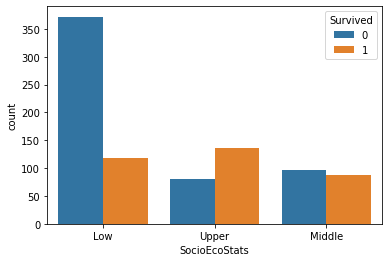

In [131]:
# Lets Check how it is Distributed
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = "SocioEcoStats", hue = "Survived", data = titanic)

In [129]:
# Check if Survival is Also Independent of SES
# Ho: Survival is Independent of SocioEcoStatus
# H1: Null is False meaning that Survival depends on whether you are rich or not.
teststats, pvalue, df, exp_freq = stats.chi2_contingency(pd.crosstab(titanic.SocioEcoStats, titanic.Survived))

print(teststats)
print(pvalue)

# Again the P Value is 0 meaning that the Survival is Dependent on the SocioEcoStatus.

102.88898875696057
4.5492517112987287e-23


In [0]:
# Does the Fare Same for all the PClasses
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm

In [148]:
formula = 'Pclass ~ Fare'
model = ols(formula, titanic).fit() # Fitting the Anova Table
aov_table = anova_lm(model) # Generating the Anova Table
print(aov_table)

# Conclusion - Mean Fare Paid across Categories is not Same. Avg Fare is Different for each category

             df      sum_sq     mean_sq           F        PR(>F)
Fare        1.0  187.850073  187.850073  384.547434  1.967386e-71
Residual  889.0  434.273383    0.488496         NaN           NaN


In [149]:
# Does the Survival Depends on the Family Count
teststats, pvalue, df, exp_freq = stats.chi2_contingency(pd.crosstab(titanic.Family, titanic.Survived))
print(teststats)
print(pvalue)

# Again the P Value is 0 meaning that the Survival is Dependent on the Family Count. The Same can be seen in the Plot Too.

48.13393377928416
3.352263602998165e-08


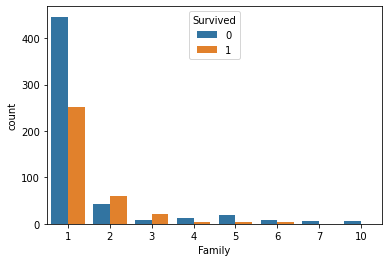

In [141]:
sns.countplot(x = "Family", hue = "Survived", data = titanic)

In [151]:
# Is the Fare Same Across the Survived Class Too.
stats.ttest_ind(titanic.loc[titanic.Survived==1, "Fare"], titanic.loc[titanic.Survived==0, "Fare"])

Ttest_indResult(statistic=7.939191660871055, pvalue=6.120189341924198e-15)

In [152]:
# Does the Survival Depend on the Boarding Point
teststats, pvalue, df, exp_freq = stats.chi2_contingency(pd.crosstab(titanic.Embarked, titanic.Survived))
print(teststats)
print(pvalue)

# Again the P Value is 0 meaning that the Survival is Dependent on the Location of Boarding

25.964452881874784
2.3008626481449577e-06


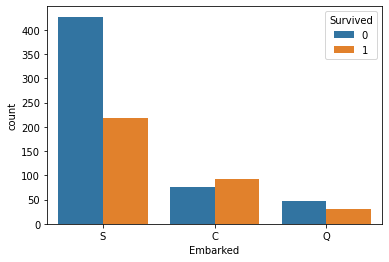

In [153]:
sns.countplot(titanic.Embarked, hue = "Survived", data = titanic)
# Southampton People have better Survival Count

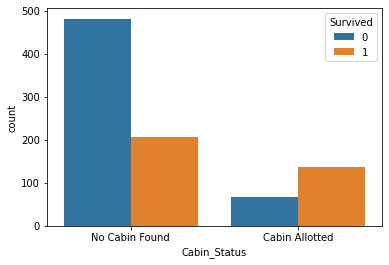

In [154]:
sns.countplot(titanic.Cabin_Status, hue = "Survived", data = titanic)
# No Cabin Found have better Survival Count

In [155]:
# Does the Survival Depend on the Boarding Point
teststats, pvalue, df, exp_freq = stats.chi2_contingency(pd.crosstab(titanic.Cabin_Status, titanic.Survived))
print(teststats)
print(pvalue)

# Again the P Value is 0 meaning that the Survival is Dependent on the Cabin Status. The People Had no Cabin had better survival chances.

87.94148561238097
6.7419704360811776e-21


In [156]:
# Does the Survival Depend on the Boarding Point
teststats, pvalue, df, exp_freq = stats.chi2_contingency(pd.crosstab(titanic.Titles, titanic.Survived))
print(teststats)
print(pvalue)

# Again the P Value is 0 meaning that the Survival is Dependent on the Titles. 
# Miss & Mrs Found have better Survival Count

284.6667057498796
1.9783487591671835e-59


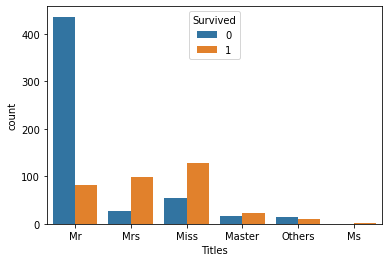

In [157]:
sns.countplot(titanic.Titles, hue = "Survived", data = titanic)
# Miss & Mrs Found have better Survival Count